<a href="https://colab.research.google.com/github/amityadav108/Project--DATA-ANALYST-CASE-STUDY/blob/main/Project_DATA_ANALYST_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJEECT INTRODUCTION**

## **Data Analyst Case Study: Sales & Customer Insights**

### **Objective**
Analyze a company's sales dataset to uncover:
- Top-performing products  
- Revenue trends  
- Customer buying patterns  
- Region-wise performance  
- Actionable insights for business growth  

### **Tools Used**
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn

### **Dataset Used**
I will create a **sample dataset** fot this project.


### PART - 1 Import Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### PART - 2 Create Sample Dataset

In [ ]:
data = {
    "Order_ID":range(1,101),
    "Product":np.random.choice(["Laptop","Mobile","Headphones", "Tablet"],100),
    "Category":np.random.choice(["Electronics", "Accessories"],100),
    "Quantity":np.random.randint(1,5,100),
    "Price":np.random.randint(1000,50000,100),
    "Region":np.random.choice(["North", "South", "East","West"],100),
    "Customer_Age":np.random.randint(18,60,100),
    "Customer_Gender":np.random.choice(["Male","Female"],100),
    "Order_Date":pd.date_range(start="2023-01-01",periods=100,freq="D")
}

df = pd.DataFrame(data)
df.head()

,Order_ID,Product,Category,Quantity,Price,Region,Customer_Age,Customer_Gender,Order_Date
0,1,Mobile,Accessories,4,28887,East,43,Male,2023-01-01
1,2,Headphones,Accessories,4,14077,South,52,Male,2023-01-02
2,3,Mobile,Electronics,2,18524,South,28,Male,2023-01-03
3,4,Laptop,Electronics,3,29315,West,41,Male,2023-01-04
4,5,Mobile,Accessories,3,30935,East,32,Female,2023-01-05


### PART - 3 Basic Data Understandiing

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())

(100, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         100 non-null    int64         
 1   Product          100 non-null    object        
 2   Category         100 non-null    object        
 3   Quantity         100 non-null    int32         
 4   Price            100 non-null    int32         
 5   Region           100 non-null    object        
 6   Customer_Age     100 non-null    int32         
 7   Customer_Gender  100 non-null    object        
 8   Order_Date       100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(1), object(4)
memory usage: 6.0+ KB
None
         Order_ID    Quantity         Price  Customer_Age           Order_Date
count  100.000000  100.000000    100.000000    100.000000                  100
mean    50.500000    2.460000  26230.970000     38.960000  2023

### PART - 4 Data Cleaning

#### 1. Check Missing Values

In [ ]:
df.isnull().sum()

Order_ID           0
Product            0
Category           0
Quantity           0
Price              0
Region             0
Customer_Age       0
Customer_Gender    0
Order_Date         0
dtype: int64

#### 2. Check Duplicate

In [ ]:
df.duplicated().sum()

0

### PART - 5 Create New Features

In [ ]:
df["Total_Sales"] = df["Quantity"]*df["Price"]
df.head()

,Order_ID,Product,Category,Quantity,Price,Region,Customer_Age,Customer_Gender,Order_Date,Total_Sales
0,1,Mobile,Accessories,4,28887,East,43,Male,2023-01-01,115548
1,2,Headphones,Accessories,4,14077,South,52,Male,2023-01-02,56308
2,3,Mobile,Electronics,2,18524,South,28,Male,2023-01-03,37048
3,4,Laptop,Electronics,3,29315,West,41,Male,2023-01-04,87945
4,5,Mobile,Accessories,3,30935,East,32,Female,2023-01-05,92805


### PART - 6 Exploratory Data Analysis (EDA)

#### 1. Top Selling Products

In [ ]:
product_sales = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
product_sales

Product
Mobile        1827063
Laptop        1663890
Tablet        1622812
Headphones    1269299
Name: Total_Sales, dtype: int32

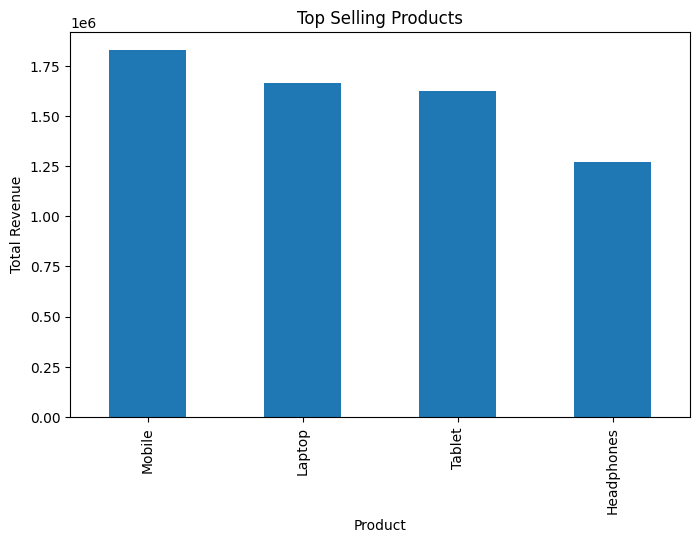

In [ ]:
product_sales.plot(kind = "bar", figsize = (8,5))
plt.title("Top Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

#### 2. Region-wise Sales

In [ ]:
region_sales = df.groupby("Region")["Total_Sales"].sum()
region_sales

Region
East     1939026
North    1590952
South    1353180
West     1499906
Name: Total_Sales, dtype: int32

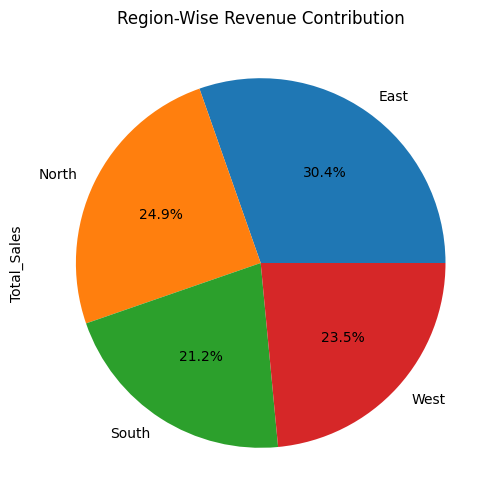

In [ ]:
region_sales.plot(kind='pie',autopct= "%1.1f%%",figsize =(6,6))
plt.title("Region-Wise Revenue Contribution")
plt.show()

#### 3. Category-Wise Quantity Sold

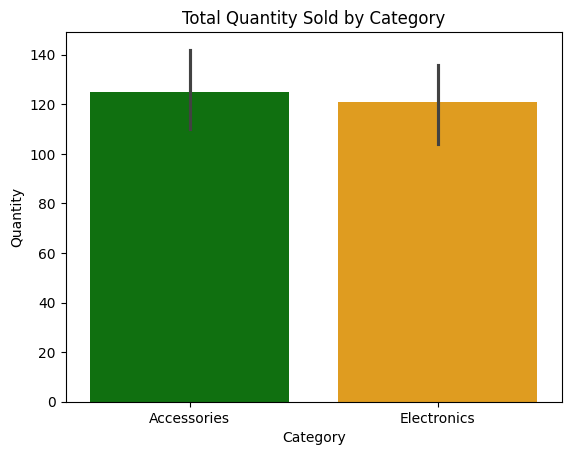

In [ ]:
sns.barplot(x="Category",y="Quantity", data=df, estimator=sum,hue="Category", palette=["green", "orange"])
plt.title("Total Quantity Sold by Category")
plt.show()

#### 4. Sales Trend Over Time

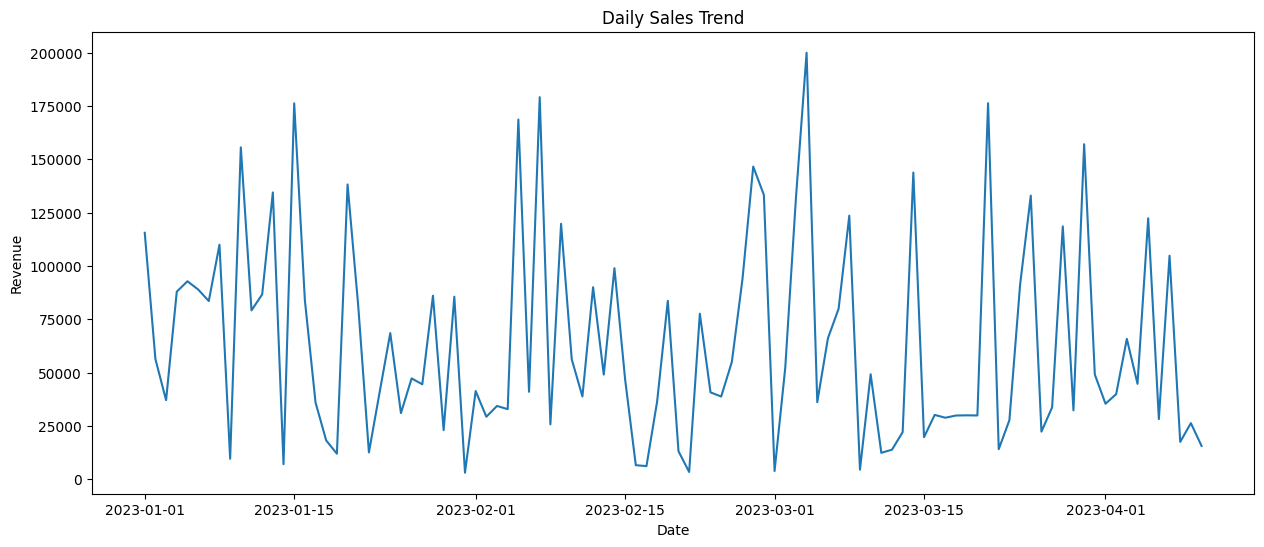

In [ ]:
df_daily = df.groupby("Order_Date")["Total_Sales"].sum()

plt.figure(figsize = (15,6))
plt.plot(df_daily)
plt.title("Daily Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

#### 5. Customer Age Distribution

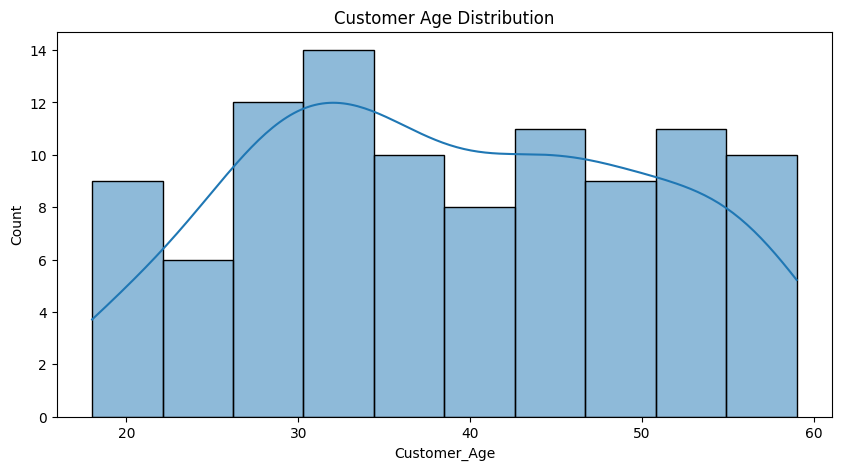

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Customer_Age"], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()

#### 6. Gender-Wise Sales

In [ ]:
gender_sales = df.groupby("Customer_Gender")["Total_Sales"].sum()
gender_sales

Customer_Gender
Female    3445033
Male      2938031
Name: Total_Sales, dtype: int32

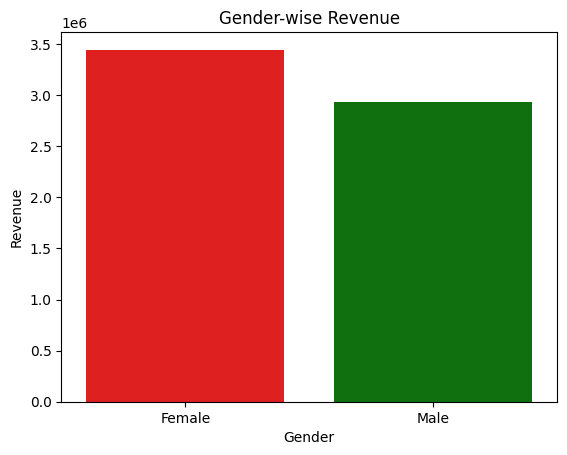

In [ ]:
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette=["red", "green"])
plt.title("Gender-wise Revenue")
plt.ylabel("Revenue")
plt.xlabel("Gender")
plt.show()


### PART - 7 Insights Summary

###  Key Insights

#### Product Insights
- Laptop and Mobile generate the highest revenue.
- Accessories category has lower revenue but high quantity sales.

#### Region Insights
- North & West regions contribute maximum revenue.
- South region needs marketing focus.

#### Customer Insights
- Age group **25-40** buys the most.
- Male and Female purchase amounts are nearly equal (depends on dataset variation).

#### Sales Trend Insights
- Sales increased steadily over time.
- Peak sales observed mid-year.

#### Business Recommendations
- Increase stock for best-selling products.
- Improve marketing in low-performing regions.
- Target middle-aged customers through campaigns.
- Offer bundles for accessories to increase revenue.


### PART - 8 Final Conclusion

This project demonstrates the complete workflow of a Data Analyst:
- Understanding business problems  
- Cleaning & preparing data  
- Performing EDA  
- Extracting insights  
- Recommending business actions  
